# Explore here

In [2]:

import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

#línea de código toma el DataFrame llamado total_data y lo guarda como un archivo CSV llamado total_data.csv en la carpeta ../data/raw/ 
#sin incluir el índice del DataFrame como una columna adicional en el archivo CSV.

In [4]:
# Saber cuantas filas y columnas tiene el DataFrame

total_data.shape

(48895, 16)

In [5]:
#Saber la informacion que contiene el Dataframe
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

-Tenemos por un lado 8 tipos diferentes caracteres (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365)
- Y por otro lado tenemos 8 tipos diferentes de numeros (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count)

In [7]:
# Empezamos a limpiar el Dataframe y eliminamos archivos duplicados 

print(f"El número duplicado de Name es: {total_data['name'].duplicated().sum()}")
print(f"El número duplicado de Host ID es: {total_data['host_id'].duplicated().sum()}")
print(f"El número duplicado de ID es: {total_data['id'].duplicated().sum()}")

El número duplicado de Name es: 989
El número duplicado de Host ID es: 11438
El número duplicado de ID es: 0


In [8]:
# Pasamos a eliminar la informacion relevante 
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

# axis=1: Este parámetro indica que las operaciones se realizarán a lo largo de las columnas del DataFrame.
# inplace=True: Este parámetro modifica el DataFrame total_data directamente. Si se establece en True, los cambios se aplicarán al DataFrame original 
# y no se devolverá una copia modificada.

#    axis=0: Indicaría que la eliminación se realiza a lo largo de las filas del DataFrame.
#   axis=1: Indicaría que la eliminación se realiza a lo largo de las columnas del DataFrame.

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

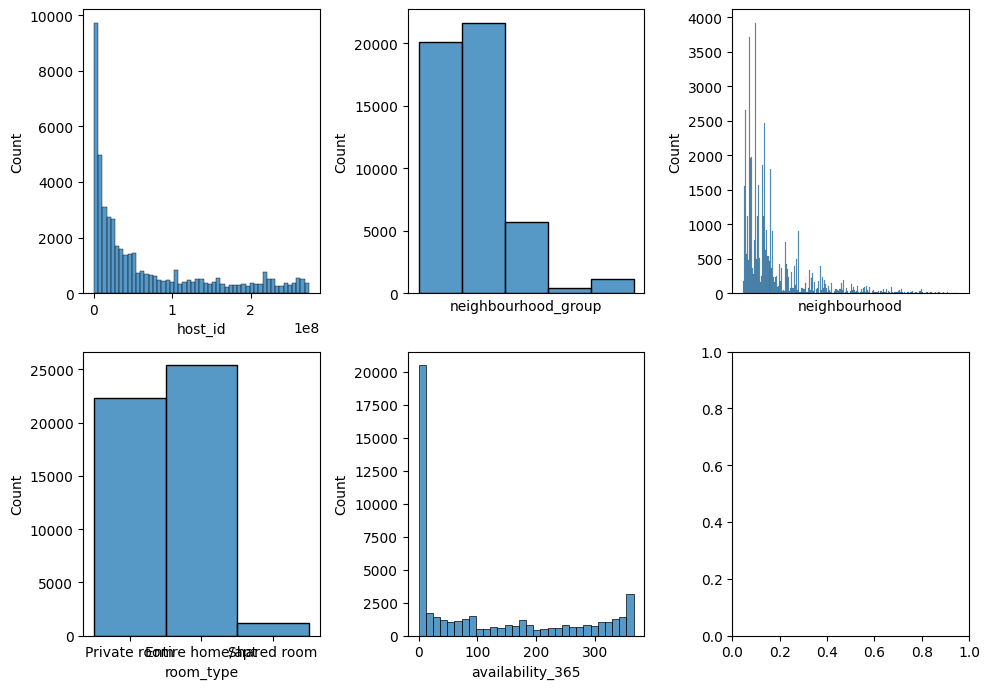

In [14]:
# Análisis sobre variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")

# Al utilizar .set_xticks([]), estás eliminando las marcas (ticks) en el eje x del gráfico, lo que resultará en un gráfico donde el eje x no mostrará 
# valores o marcas específicas. Esto puede ser útil en situaciones donde no se necesitan las marcas del eje x o cuando se desea un gráfico más limpio 
# sin esas referencias visuales.


plt.tight_layout()


plt.show()

En el histograma podemos observar que:

Hay varios anfitriones con muchas habitaciones para alquilar. La mayoría de las habitaciones están disponibles durante todo el año, pero también hay muchos NaN para el Host_Id
Hay más casas enteras y apartamentos para alquilar que habitaciones privadas. 
Y las habitaciones compartidas es la mas demandada 
Posiblemente nos falte informacion ya que tenemos muchos datos con 0 / NaN

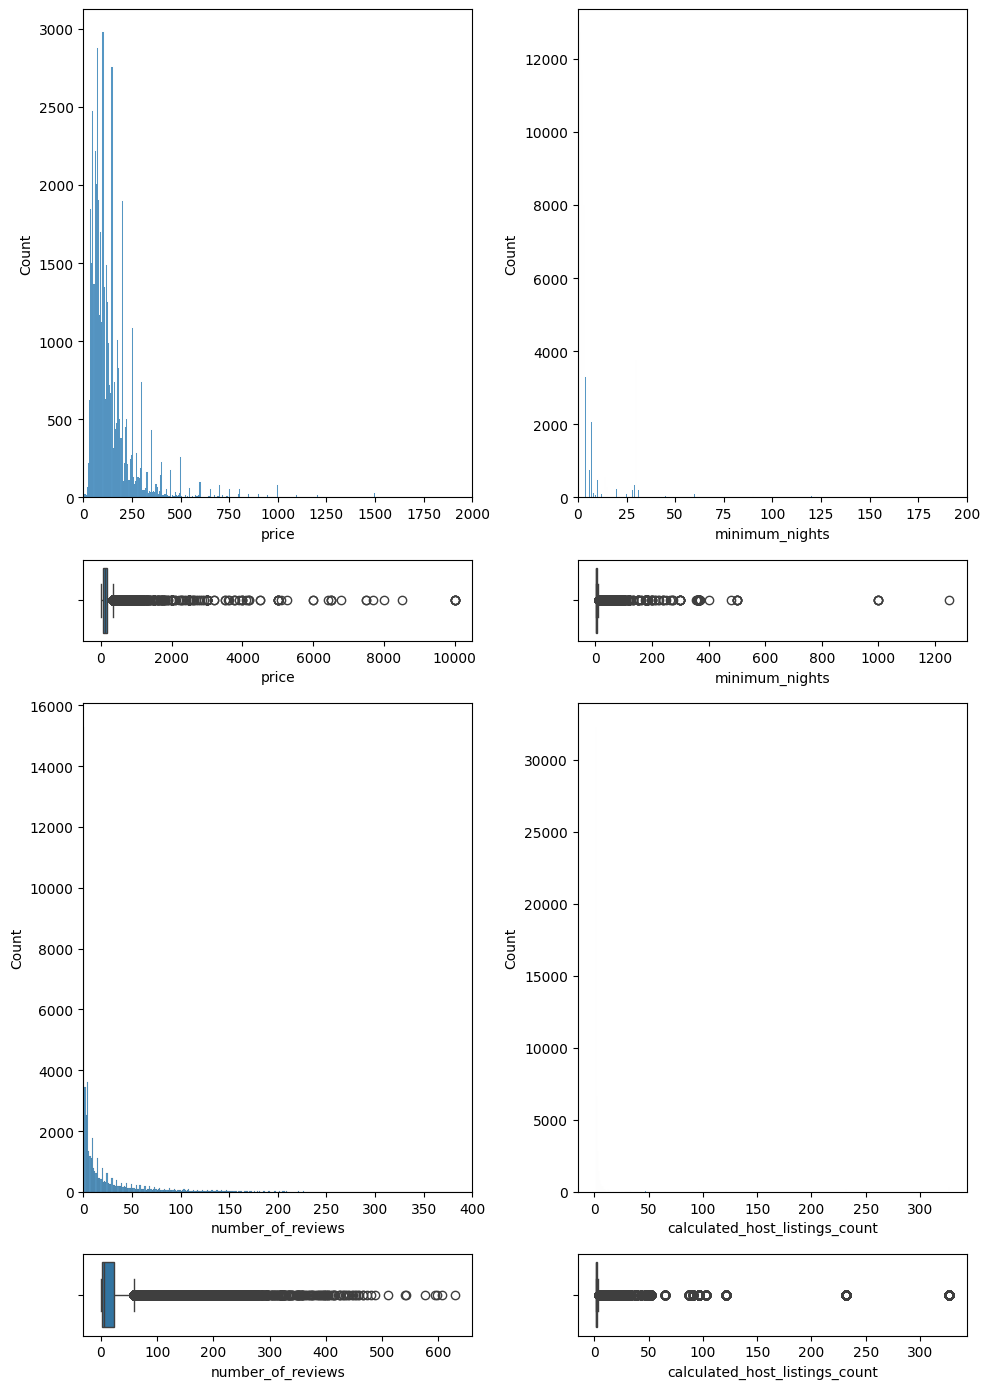

In [18]:
# Análisis sobre variables numéricas

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set_xlim(0, 2000)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
# Al utilizar .set_xlim(0, 200), estás configurando el rango visible del eje x en el gráfico para que vaya desde 0 hasta 200 unidades 
# en la escala del eje horizontal. Esto puede ser útil para enfocar el gráfico en un rango específico de valores en el eje x y visualizar 
# solo esa porción relevante de los datos.
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews").set_xlim(0, 400)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")


plt.tight_layout()


plt.show()


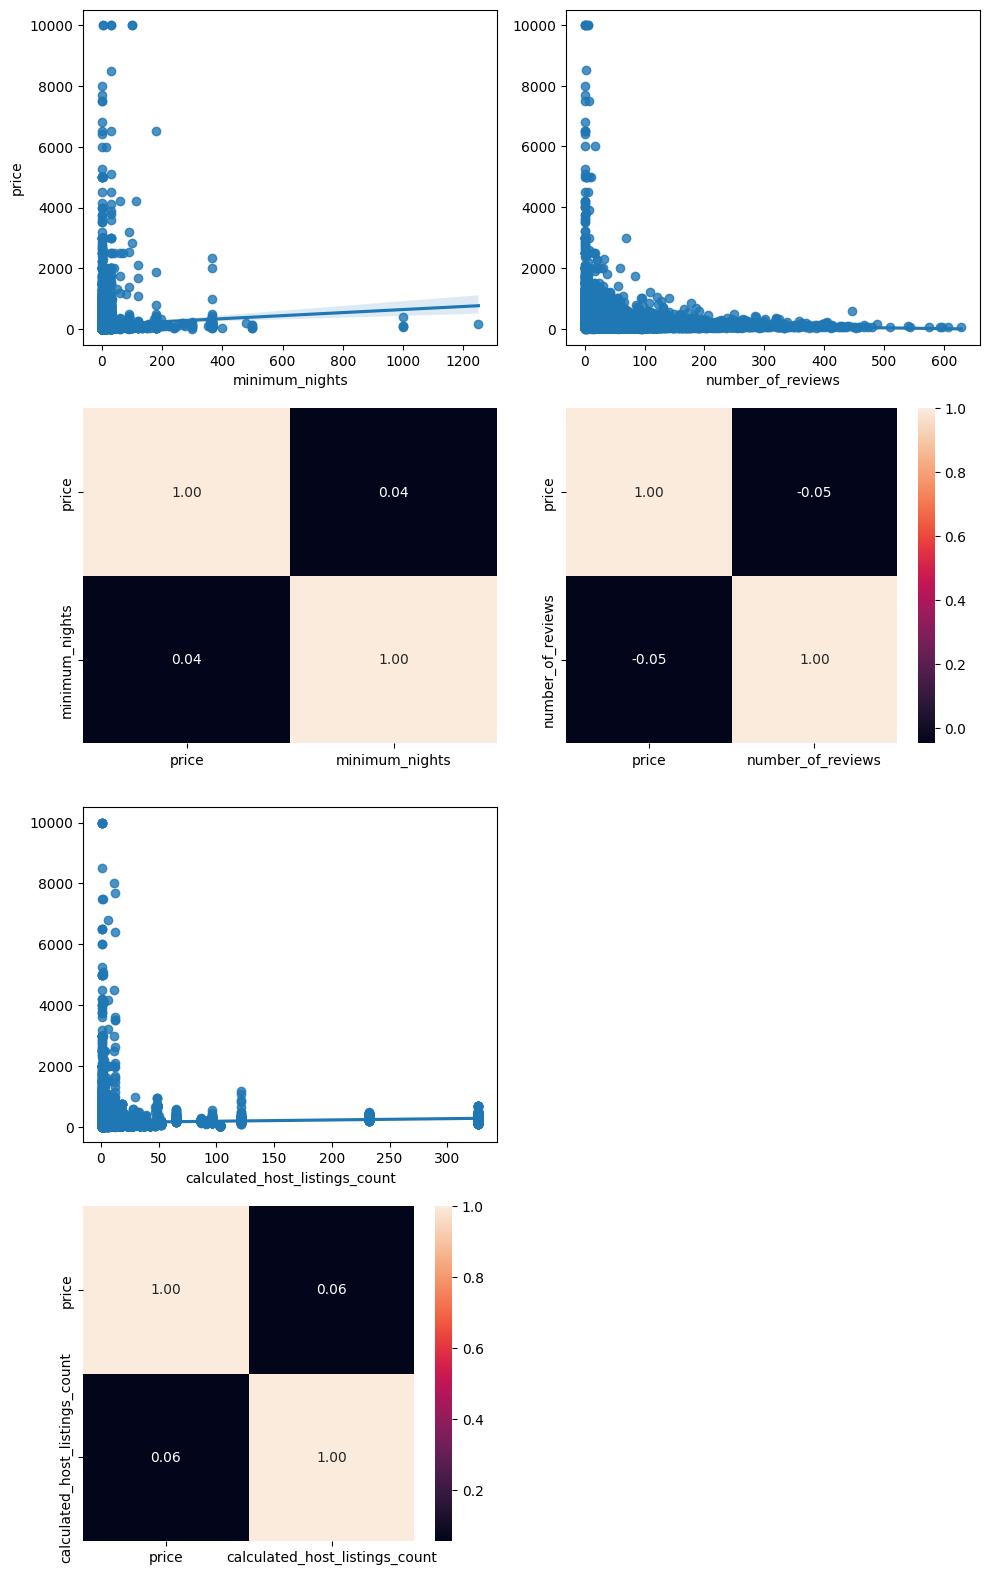

In [19]:
# Análisis numérico-numérico

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()


plt.show()

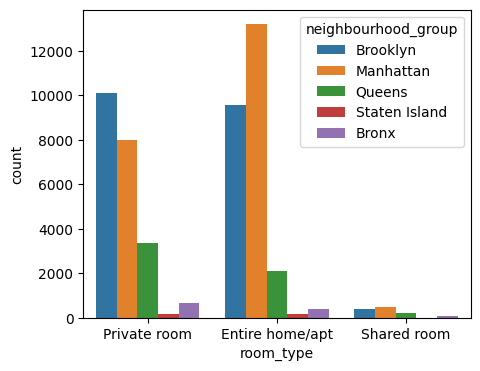

In [20]:
# Análisis categórico-categórico

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()


Del análisis categórico podemos concluir:

Manhattan es el lugar con más lugares para alquilar
Brooklyn es el 2º lugar con más lugares para alquilar, pero tiene más Habitaciones Privadas, lo que significa probablemente más gente compartiendo su casa
Queens y Bronx son la 3 ª y 4 ª y comparte el mismo principio que Brookyln.
Staten casi no tiene expresión, y no es muy propenso a AirBnb.


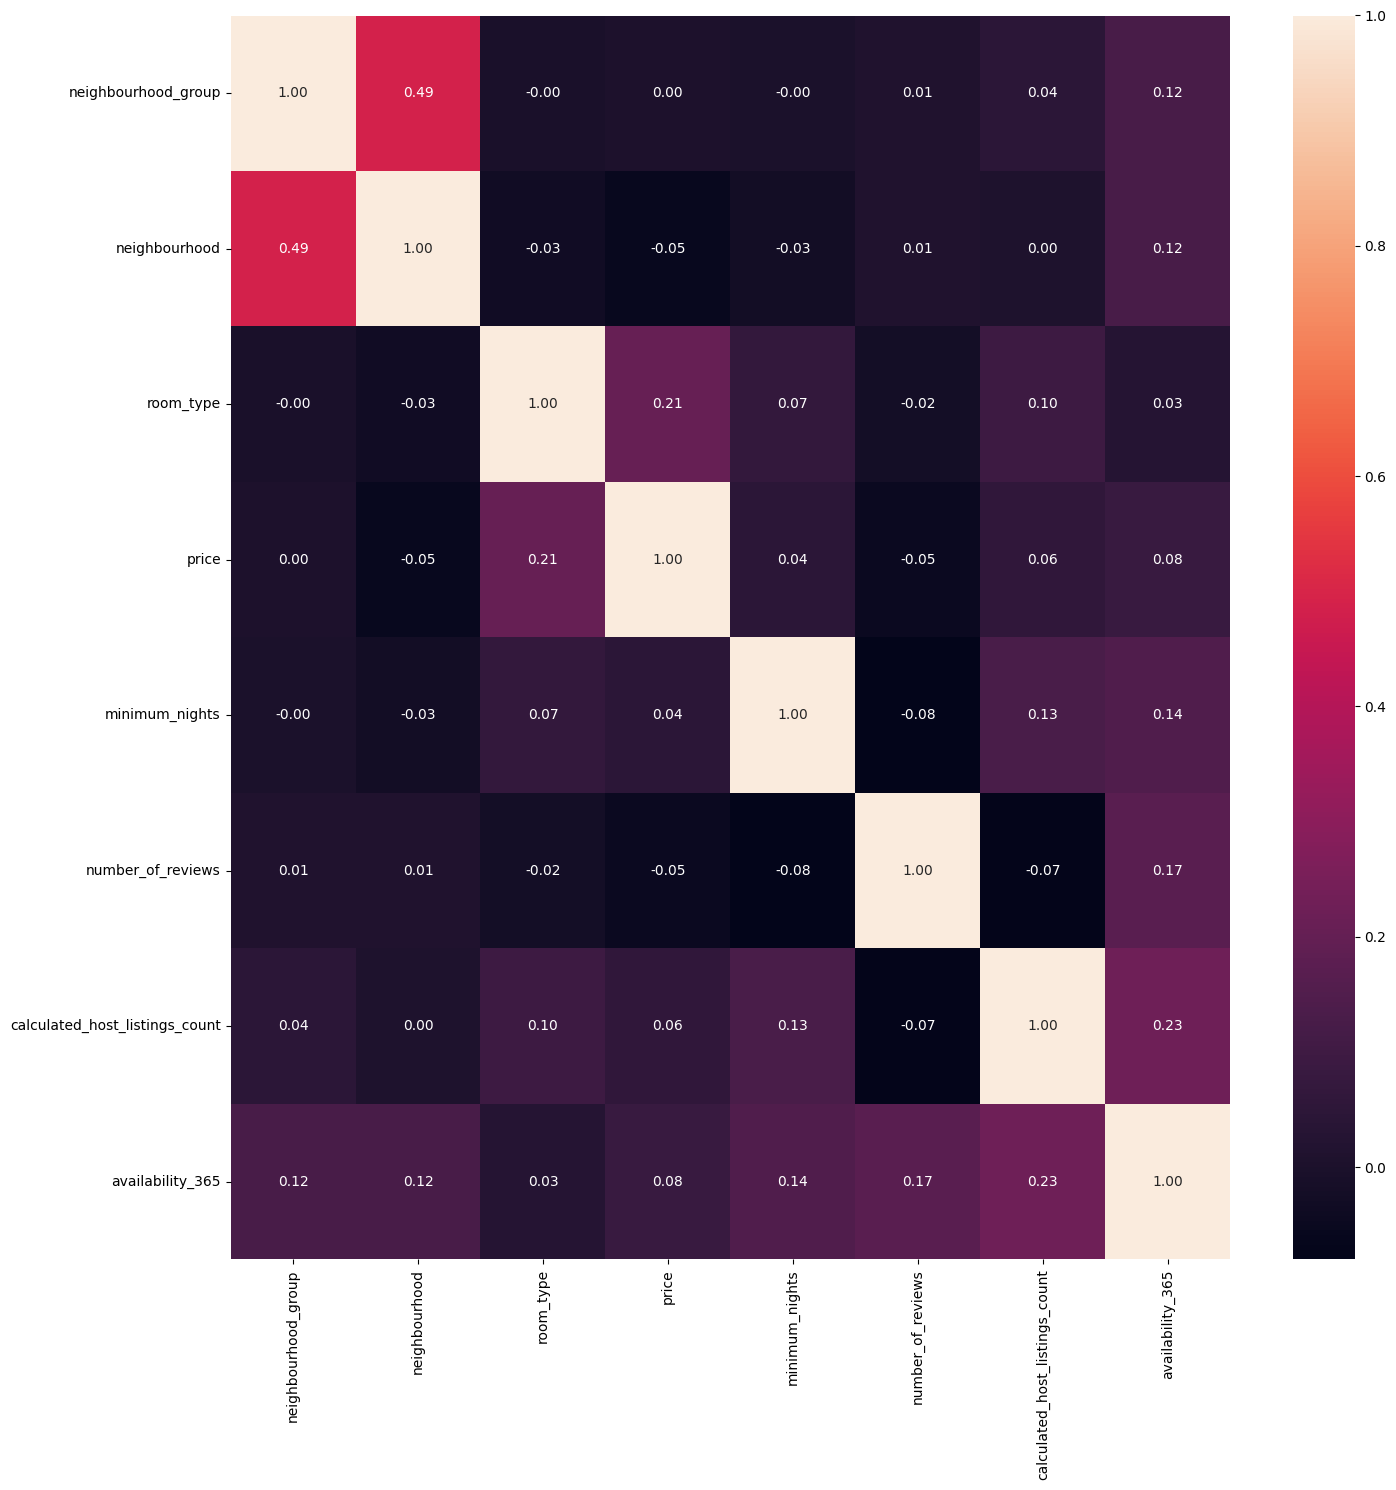

In [21]:
# Análisis de correlaciones

total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

# estas líneas de código convierten las columnas categóricas ("room_type", "neighbourhood_group", "neighbourhood")
# del DataFrame total_data en números enteros únicos, lo que facilita el uso de estos datos en algoritmos de aprendizaje automático que requieren 
# variables numéricas en lugar de categóricas.


fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",
                         "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

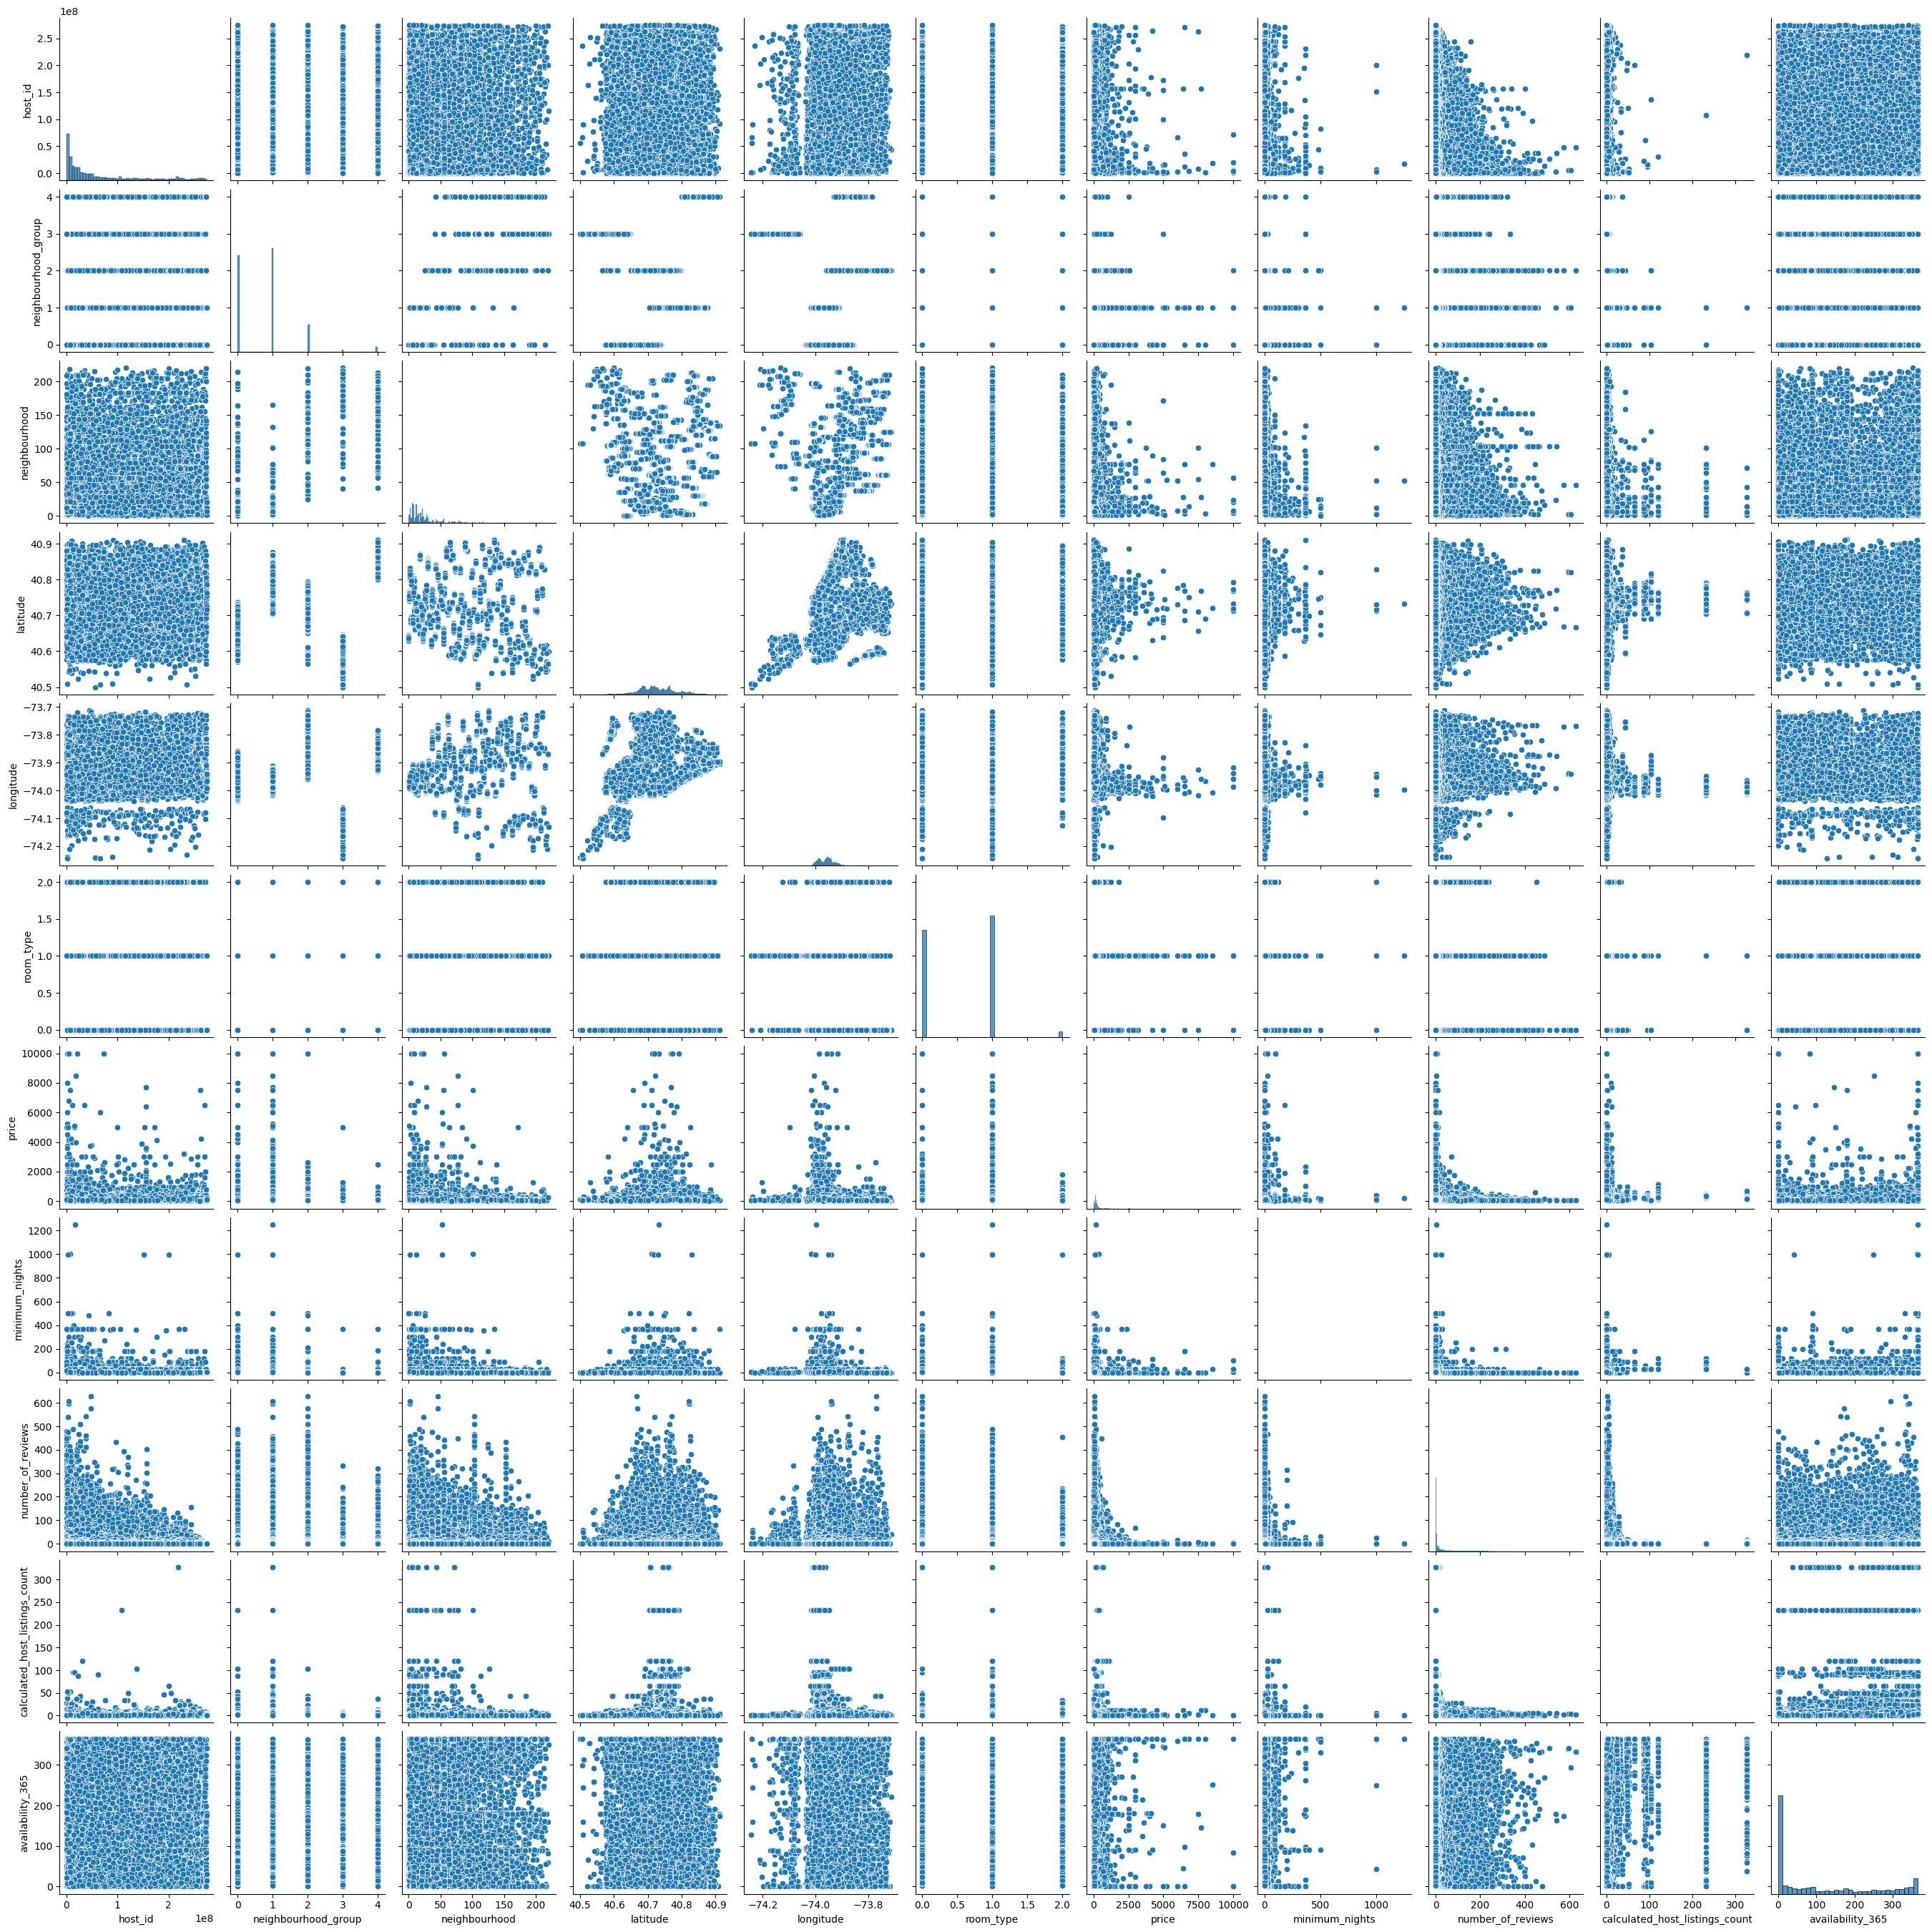

In [22]:
# Análisis numérico-categórico (completo)

sns.pairplot(data = total_data)

In [23]:
# Análisis de outliers

total_data.describe()

host_id  neighbourhood_group  neighbourhood      latitude  \
count  4.889500e+04         48895.000000   48895.000000  48895.000000   
mean   6.762001e+07             0.786911      29.888782     40.728949   
std    7.861097e+07             0.844386      34.676634      0.054530   
min    2.438000e+03             0.000000       0.000000     40.499790   
25%    7.822033e+06             0.000000       7.500000     40.690100   
50%    3.079382e+07             1.000000      19.000000     40.723070   
75%    1.074344e+08             1.000000      37.000000     40.763115   
max    2.743213e+08             4.000000     220.000000     40.913060   

          longitude     room_type         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean     -73.952170      0.567113    152.720687        7.029962   
std        0.046157      0.541249    240.154170       20.510550   
min      -74.244420      0.000000      0.000000        1.000000   
25%      -73.983070      0.000000     69.000000        1.000000   
50%      -73.955680      1.000000    106.000000        3.000000   
75%      -73.936275      1.000000    175.000000        5.000000   
max      -73.712990      2.000000  10000.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean           23.274466                        7.143982        112.781327  
std            44.550582                       32.952519        131.622289  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000          0.000000  
50%             5.000000                        1.000000         45.000000  
75%            24.000000                        2.000000        227.000000  
max           629.000000                      327.000000        365.000000

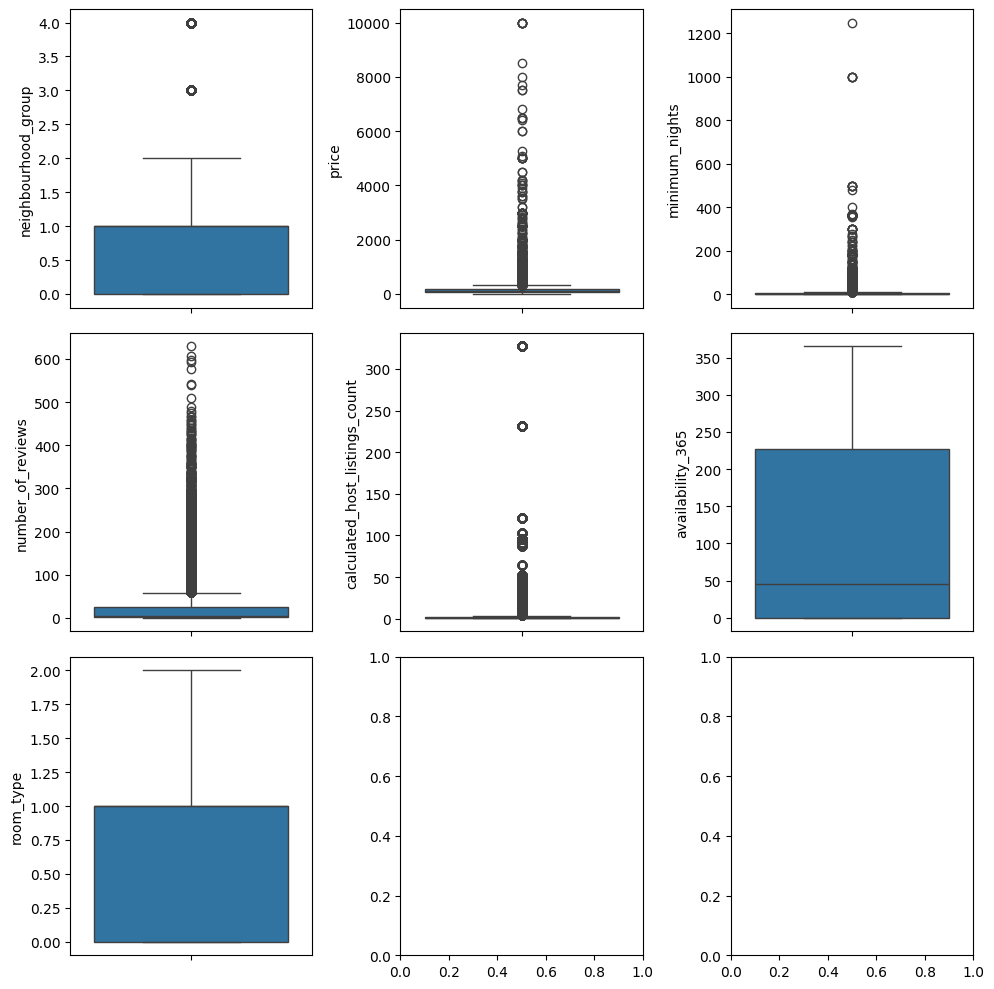

In [25]:
fig, axes = plt.subplots(3, 3, figsize = (10, 10))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")

plt.tight_layout()

plt.show()

In [26]:
# Por precio
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [32]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")


Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [35]:
total_data = total_data[total_data["price"] > 0]

In [37]:
# Por minimum_nights

nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    3357.000000
mean        8.705987
std        27.482603
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max      1000.000000
Name: minimum_nights, dtype: float64

In [38]:
ights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")



The upper and lower limits for finding outliers are 9.5 and -2.5, with an interquartile range of 3.0


In [39]:
# Limpiar el outliers

total_data = total_data[total_data["minimum_nights"] <= 15]

In [40]:
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  724
Count of 2:  700
Count of 3:  679
Count of 4:  269


In [41]:
# Por number_of_reviews
review_stats = total_data["number_of_reviews"].describe()
review_stats

count    2866.000000
mean       15.412073
std        32.962173
min         0.000000
25%         0.000000
50%         3.000000
75%        14.000000
max       447.000000
Name: number_of_reviews, dtype: float64

In [42]:
review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper and lower limits for finding outliers are 35.0 and -21.0, with an interquartile range of 14.0


In [43]:
# Por calculated_host_listings_count
hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    2866.000000
mean        7.878227
std        41.991865
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       327.000000
Name: calculated_host_listings_count, dtype: float64

In [44]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")


The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [45]:
count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  2565
Count of 1:  2069
Count of 2:  267


In [46]:
# Análisis de valores perdidos

total_data.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [47]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
85            0.055928        0.000000                        0.000000   
103           0.102908        0.214286                        0.003067   
114           0.015660        0.071429                        0.009202   
116           0.724832        0.142857                        0.000000   
121           0.035794        0.071429                        0.003067   

     availability_365  neighbourhood_group  room_type  price  
85           0.019178                 0.00        0.5    800  
103          0.665753                 0.25        0.5    500  
114          0.816438                 0.25        0.5    350  
116          0.293151                 0.00        0.5    325  
121          0.591781                 0.00        0.5    400

In [48]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
0           0.002237        0.142857                             0.0   
1           0.192394        0.000000                             0.0   
2           0.004474        0.142857                             0.0   
3           0.002237        0.000000                             0.0   
4           0.015660        0.142857                             0.0   

   availability_365  
0          0.065753  
1          0.715068  
2          0.663014  
3          1.000000  
4          0.000000

In [49]:
# Guardar los datos limpios y sin procesar

X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)